In [5]:
import os
import pandas as pd


s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
print('URL:', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


C:\Users\김은교\AppData\Local\Temp\ipykernel_24400\830623769.py:27: RuntimeWarning: overflow encountered in square
  cost = (errors**2).sum() / 2.0
C:\Users\김은교\AppData\Local\Temp\ipykernel_24400\830623769.py:25: RuntimeWarning: invalid value encountered in add
  self.w_[1:] += self.eta * X.T.dot(errors)


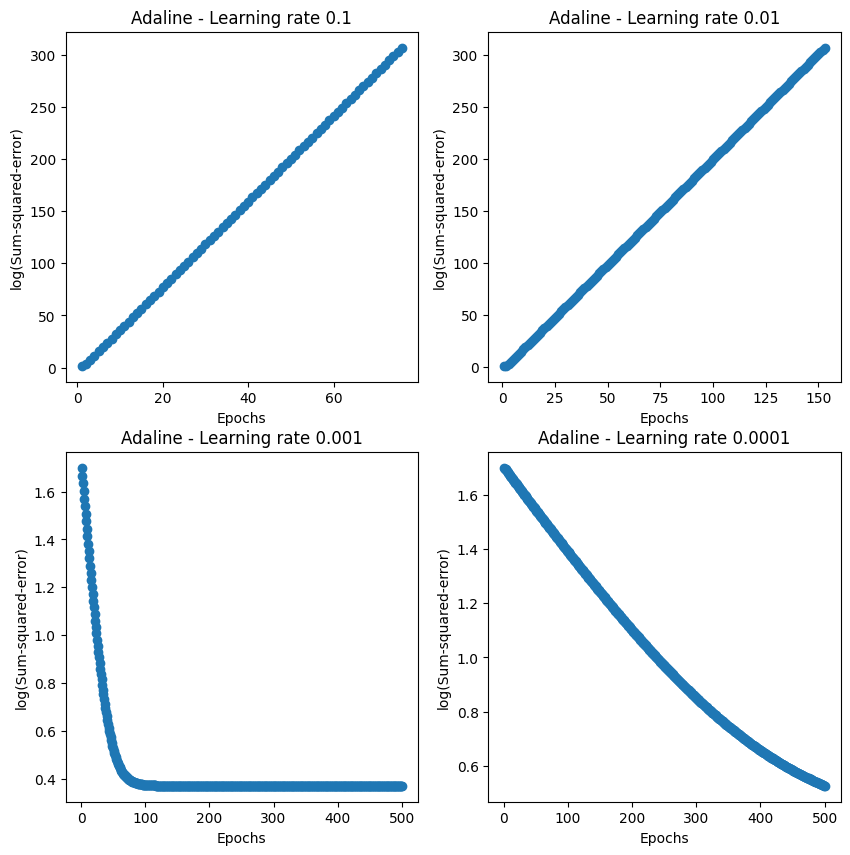

In [41]:
import matplotlib.pyplot as plt
import numpy as np


y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100, [1, 3]].values


class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        return X

    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(10, 10))

ada1 = AdalineGD(n_iter=500, eta=0.1).fit(X, y)
ax[0,0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker='o')
ax[0,0].set_xlabel('Epochs')
ax[0,0].set_ylabel('log(Sum-squared-error)')
ax[0,0].set_title('Adaline - Learning rate 0.1')


ada2 = AdalineGD(n_iter=500, eta=0.01).fit(X, y)
ax[0,1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker='o')
ax[0,1].set_xlabel('Epochs')
ax[0,1].set_ylabel('log(Sum-squared-error)')
ax[0,1].set_title('Adaline - Learning rate 0.01')


ada3 = AdalineGD(n_iter=500, eta=0.001).fit(X, y)
ax[1,0].plot(range(1, len(ada3.cost_) + 1), np.log10(ada3.cost_), marker='o')
ax[1,0].set_xlabel('Epochs')
ax[1,0].set_ylabel('log(Sum-squared-error)')
ax[1,0].set_title('Adaline - Learning rate 0.001')


ada4 = AdalineGD(n_iter=500, eta=0.0001).fit(X, y)
ax[1,1].plot(range(1, len(ada4.cost_) + 1), np.log10(ada4.cost_), marker='o')
ax[1,1].set_xlabel('Epochs')
ax[1,1].set_ylabel('log(Sum-squared-error)')
ax[1,1].set_title('Adaline - Learning rate 0.0001')

plt.show()


In [34]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

C:\Users\김은교\AppData\Local\Temp\ipykernel_24400\1333931499.py:19: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


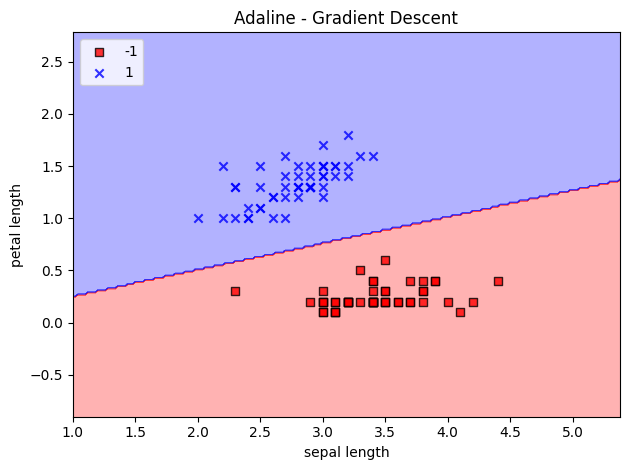

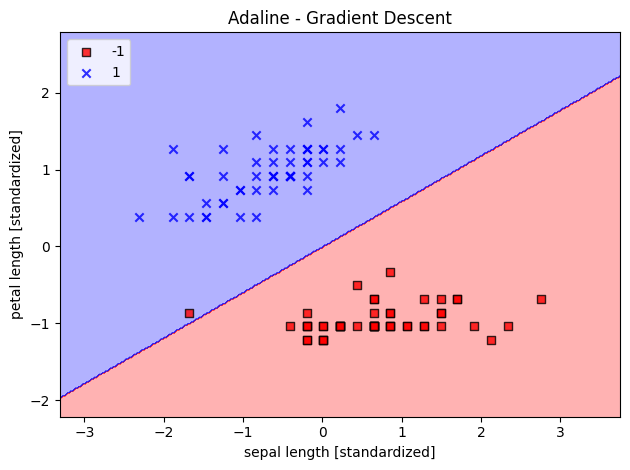

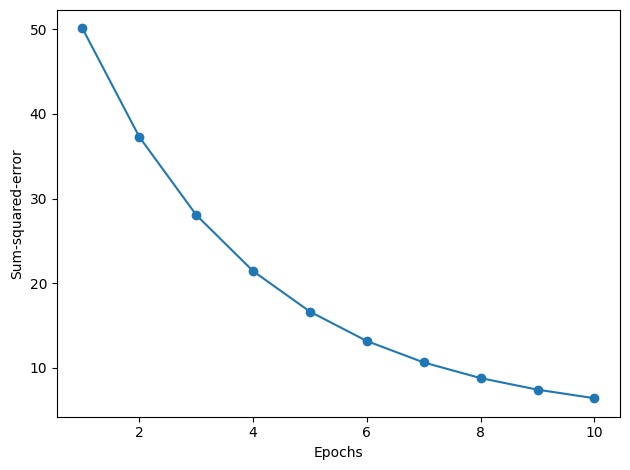

In [42]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):

    markers = ('s', 'x')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')


plot_decision_regions(X, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()


ada_gd = AdalineGD(n_iter=10, eta=0.001)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1), ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Sum-squared-error')

plt.tight_layout()
plt.show()
